In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matrix import *

def plot_data(data, name, annotate=True):
    num_unique_values = len(np.unique(data))
    boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
    cmap = plt.get_cmap('viridis', len(boundaries) - 1)
    norm = BoundaryNorm(boundaries, cmap.N, clip=False)

    fig, ax = plt.subplots()
    cax = ax.imshow(data, cmap=cmap, norm=norm)

    # Add text annotations for each pixel
    if annotate:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                ax.text(j, i, f'{data[i, j]}', va='center', ha='center', color='w')

    # Create a colorbar with discrete values
    cbar = fig.colorbar(cax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')

    plt.title(name)
    plt.show()

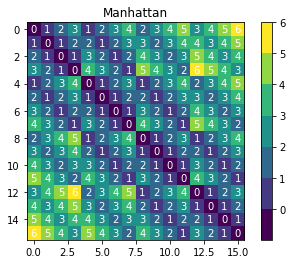

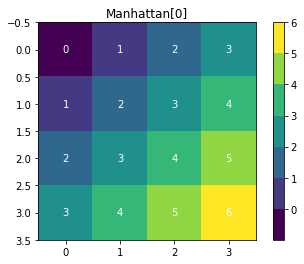

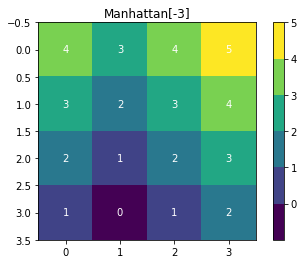

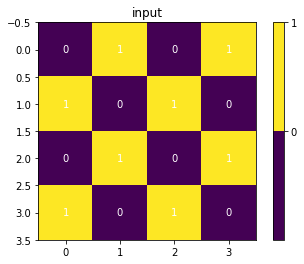

In [227]:


N = 4
r = 6

man = distance_manhattan(N)
# wrap = distance_wrapped(N)
filter_man = np.where(man > r, 0, man)
# filter_wrap = np.where(wrap > r, 0, wrap)

# print(wrap[0])

alternating = np.zeros((N, N), dtype=int)
alternating[1::2, ::2] = 1
alternating[::2, 1::2] = 1

plot_data(filter_man, "Manhattan")
plot_data(filter_man[0].reshape((N,N)), "Manhattan[0]")
plot_data(filter_man[-3].reshape((N,N)), "Manhattan[-3]")
plot_data(alternating, "input")
# plot_data(filter_wrap, "Wrapped manhattan")

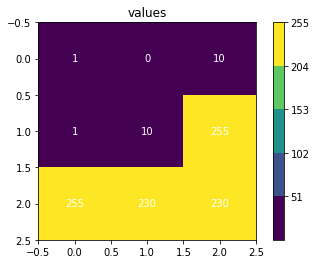

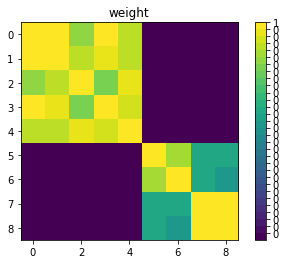

In [228]:
N2 = 3
values = np.array([[1,0,10],
                  [1,10,255],
                  [255,230,230]])

weight = dissimilarity(values/255) # normalization is a must, otherwise infintessimally small values (using the nc weight scheme at least)

plot_data(values, 'values')
plot_data(weight, 'weight', annotate=False)
# plot_data(weight[0].reshape(values.shape), 'weight[0]', annotate=False)
# plot_data(weight[3].reshape(values.shape), 'weight[3]', annotate=False)
# plot_data(weight[-3].reshape(values.shape), 'weight[-3]', annotate=False)

In [229]:
def plot_data_list_hist(data_list, names, title=None,annotate=True):
    num_plots = len(data_list)
    
    fig, axes = plt.subplots(1, 2 * num_plots, figsize=(10 * num_plots, 5))

    for idx, data in enumerate(data_list):
        num_unique_values = len(np.unique(data))
        boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
        cmap = plt.get_cmap('viridis', len(boundaries) - 1)
        norm = BoundaryNorm(boundaries, cmap.N, clip=False)

        image_ax = axes[2 * idx]
        hist_ax = axes[2 * idx + 1]

        # Plot the image on the left subplot
        cax = image_ax.imshow(data, cmap=cmap, norm=norm)

        if annotate:
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    image_ax.text(j, i, f'{data[i, j]:.3f}', va='center', ha='center', color='w')

        cbar = fig.colorbar(cax, ax=image_ax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')
        image_ax.set_title(names[idx])

        # Plot a histogram on the right subplot
        hist_ax.hist(data.ravel(), bins=9, color='blue', alpha=0.7)
        hist_ax.set_xlim([-1,1])
        hist_ax.set_xlabel('Value')
        hist_ax.set_ylabel('Frequency')
        hist_ax.set_title(f'Histogram - {names[idx]}')

    if title is not None:
        fig.suptitle(title)
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

In [230]:
import scipy
import torch
import time

include_zero = False

def get_cuts(weight, cases):
    all_vecs = []
    names = []
    if 1 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        start = time.time()
        vals, vecs = np.linalg.eigh(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        # should already be sorted
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('np.linalg.eigh[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('np.linalg.eigh[:, 1]')
            
    if 2 in cases:
        start = time.time()
        vals, vecs = np.linalg.eig(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        # reverse order (but not guaranteed?)
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('np.linalg.eig[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('np.linalg.eig[:, 1]')
        
    if 3 in cases:
        start = time.time()
        vals, vecs = scipy.linalg.eigh(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eigh[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eigh[:, 1]')
        
    if 4 in cases:
        start = time.time()
        vals, vecs = scipy.linalg.eig(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eig[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eig[:, 1]')
        
    if 5 in cases:
        start = time.time()
        vals, vecs = torch.linalg.eigh(torch.tensor(weight))
        print(f'elapsed: {time.time() - start : .4f}')
        vals = vals.numpy()
        vecs = np.real(vecs.numpy())
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('torch.linalg.eigh[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('torch.linalg.eigh[:, 1]')
        
    if 6 in cases:
        start = time.time()
        vals, vecs = torch.linalg.eig(torch.tensor(weight))
        print(f'elapsed: {time.time() - start : .4f}')
        vals = vals.numpy()
        vecs = np.real(vecs.numpy())
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('torch.linalg.eig[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('torch.linalg.eig[:, 1]')

    return all_vecs, names

def get_cuts_general(A,B, cases):
    all_vecs = []
    names = []
    if 1 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        start = time.time()
        vals, vecs = scipy.linalg.eigh(A,B)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eigh(A,B)[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eigh(A,B)[:, 1]')
    if 2 in cases:
        start = time.time()
        vals, vecs = scipy.linalg.eig(A,B)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eig(A,B)[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eig(A,B)[:, 1]')
    return all_vecs, names

def get_cuts_sparse(A,B,cases,sigma=None):
    all_vecs = []
    names = []
    if 1 in cases:
        which_val = 'SM' if sigma == None else 'LM'
        start = time.time()
        vals, vecs = scipy.sparse.linalg.eigsh(A,k=2,M=B,sigma=sigma, which=which_val)
        print(f'elapsed: {time.time() - start : .4f}')        
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(np.real(vecs[:, idx[0]]))
            names.append('scipy.sparse.linalg.eigsh[:, 0]')
        all_vecs.append(np.real(vecs[:, idx[1]]))
        names.append('scipy.sparse.linalg.eigsh[:, 1]')
    if 2 in cases:
        which_val = 'SM' if sigma == None else 'LM'
        start = time.time()
        vals, vecs = scipy.sparse.linalg.eigs(A,k=2,M=B,sigma=sigma, which=which_val)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(np.real(vecs[:, idx[0]]))
            names.append('scipy.sparse.linalg.eigs[:, 0]')
        all_vecs.append(np.real(vecs[:, idx[1]]))
        names.append('scipy.sparse.linalg.eigs[:, 1]')
    return all_vecs, names

elapsed:  0.0010
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
0.006473375728615658 4.616198871125657
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0007
[4.61619887 3.07653489 0.26272733 0.09736556 0.00647338 0.01723486
 0.74864354 0.15468544 0.02013613]
0.006473375728615849 4.6161988711256585
[4 5 8 3 7 2 6 1 0]
elapsed:  0.0014
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
0.0064733757286156565 4.616198871125655
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0004
[4.61619887+0.j 3.07653489+0.j 0.26272733+0.j 0.09736556+0.j
 0.00647338+0.j 0.01723486+0.j 0.74864354+0.j 0.15468544+0.j
 0.02013613+0.j]
(0.006473375728615849+0j) (4.6161988711256585+0j)
[4 5 8 3 7 2 6 1 0]
elapsed:  0.0009
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
0.006473375728615487 4.616198871125657
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0011
[4.61619887+0.j 3.07653489+0.j 0.26272733+0

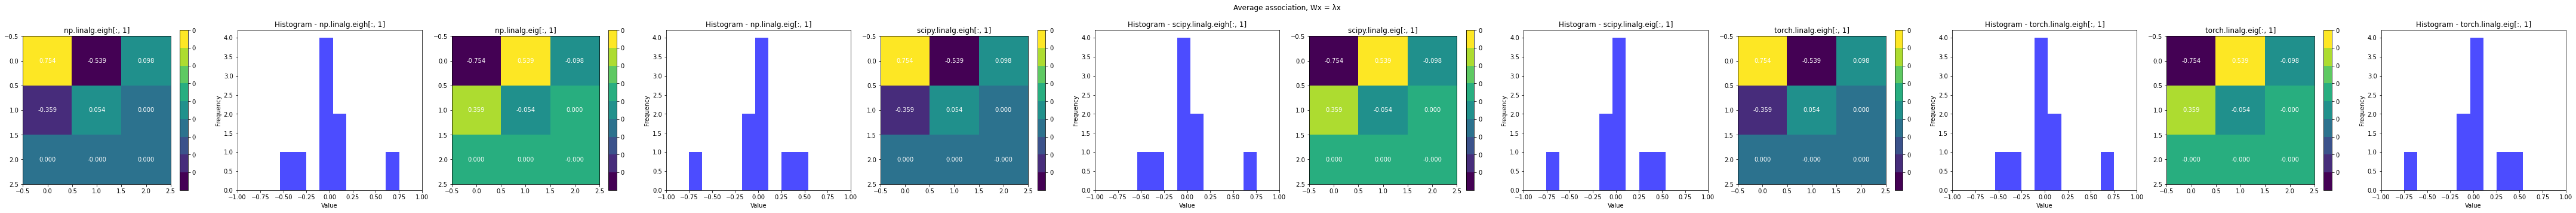

In [231]:
cases = [1,2,3,4,5,6]
all_vecs,names = get_cuts(weight, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Average association, Wx = λx')

# TODO: scipy eigh with generalized option as well
# TODO: be happy

elapsed:  0.0002
[-2.66606440e-15 -3.51085131e-16  2.32346572e+00  2.86935133e+00
  3.10733825e+00  4.27844427e+00  4.53334169e+00  4.60757122e+00
  4.65488878e+00]
-2.6660644025854354e-15 4.65488877880113
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0003
[ 4.27844427e+00  4.53334169e+00  4.65488878e+00  4.60757122e+00
 -3.07482458e-16  8.76882701e-17  2.32346572e+00  2.86935133e+00
  3.10733825e+00]
-3.074824583097596e-16 4.654888778801131
[4 5 6 7 8 0 1 3 2]
elapsed:  0.0006
[2.80741575e-15 4.90016469e-15 2.32346572e+00 2.86935133e+00
 3.10733825e+00 4.27844427e+00 4.53334169e+00 4.60757122e+00
 4.65488878e+00]
2.8074157501962096e-15 4.65488877880113
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0002
[ 4.27844427e+00+0.j  4.53334169e+00+0.j  4.65488878e+00+0.j
  4.60757122e+00+0.j -3.07482458e-16+0.j  8.76882701e-17+0.j
  2.32346572e+00+0.j  2.86935133e+00+0.j  3.10733825e+00+0.j]
(-3.074824583097596e-16+0j) (4.654888778801131+0j)
[4 5 6 7 8 0 1 3 2]
elapsed:  0.0019
[1.27878358e-16 8.92793918e-16 2.32346572e+

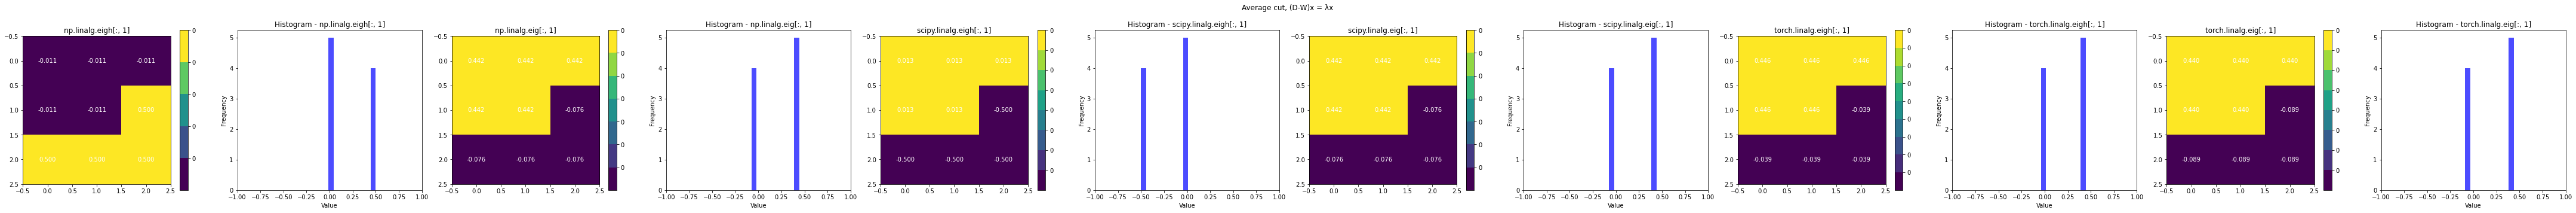

In [232]:
cases = [1,2,3,4,5,6]

# Average cut (D-W), non-generalized form
# or unnormalized laplacian (L = D-W)
d = np.sum(weight, 1)
D = np.diag(d)

all_vecs,names = get_cuts(D-weight, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Average cut, (D-W)x = λx')

elapsed:  0.0002
[-1.19374052e-16  1.05384669e-17  7.56258319e-01  9.42325416e-01
  9.48903260e-01  9.79008641e-01  9.93552915e-01  9.96301204e-01
  9.98593396e-01]
-1.1937405152950386e-16 0.9985933956391784
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0003
[ 9.42325416e-01+0.j  9.79008641e-01+0.j  9.96301204e-01+0.j
  9.98593396e-01+0.j -1.93355845e-17+0.j -3.63358896e-17+0.j
  7.56258319e-01+0.j  9.48903260e-01+0.j  9.93552915e-01+0.j]
(-3.63358896383148e-17+0j) (0.9985933956391794+0j)
[5 4 6 0 7 1 8 2 3]


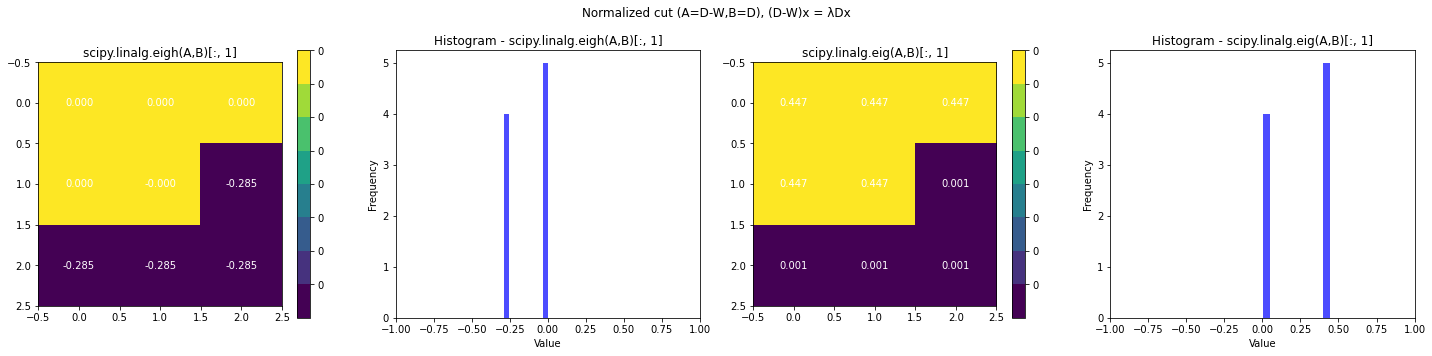

In [233]:
cases = [1,2]

# Normalized cuts (D-W), generalized form
# technically equivalent to symmetrically normalized laplacian (with their inbuilt methods?)
d = np.sum(weight, 1)
D = np.diag(d)

A = D-weight
B = D
all_vecs,names = get_cuts_general(A,B, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Normalized cut (A=D-W,B=D), (D-W)x = λDx') # or Wx = (1-λ)Dx

# also gives perfectly reasonable cuts..
# A = weight
# B = D
# all_vecs,names = get_cuts_general(A,B, cases)
# data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
# plot_data_list_hist(data_list, names, title='Normalized cut (A=W,B=D), (D-W)x = λDx') # or Wx = (1-λ)Dx

weight D None
elapsed:  0.0026
[0.0014066 0.0036988]
0.0014066043608211057 0.003698795625775862
[0 1]
elapsed:  0.0028
[0.0014066+0.j 0.0036988+0.j]
(0.001406604360821187+0j) (0.0036987956257758733+0j)
[0 1]


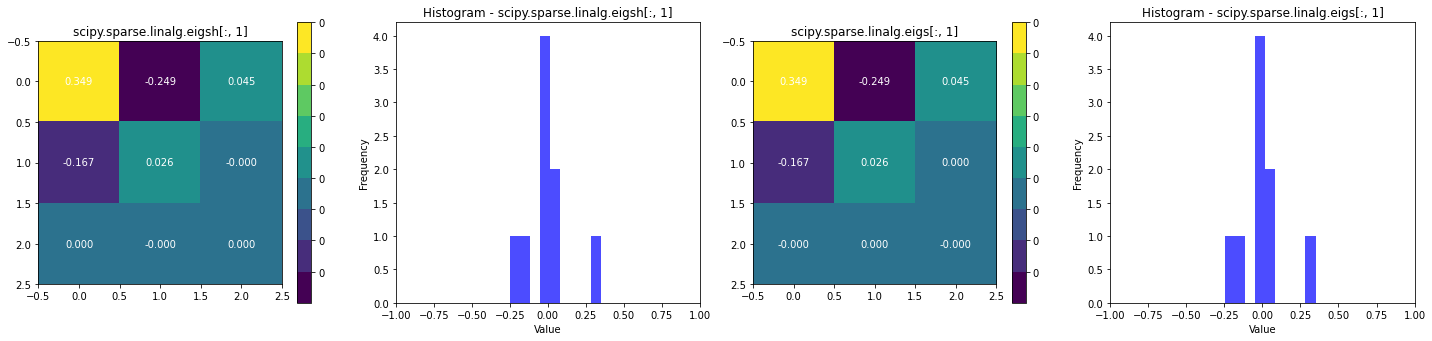

weight D 0
elapsed:  0.0014
[0.0014066 0.0036988]
0.0014066043608211883 0.0036987956257758694
[0 1]
elapsed:  0.0017
[0.0014066+0.j 0.0036988+0.j]
(0.0014066043608211877+0j) (0.00369879562577587+0j)
[0 1]


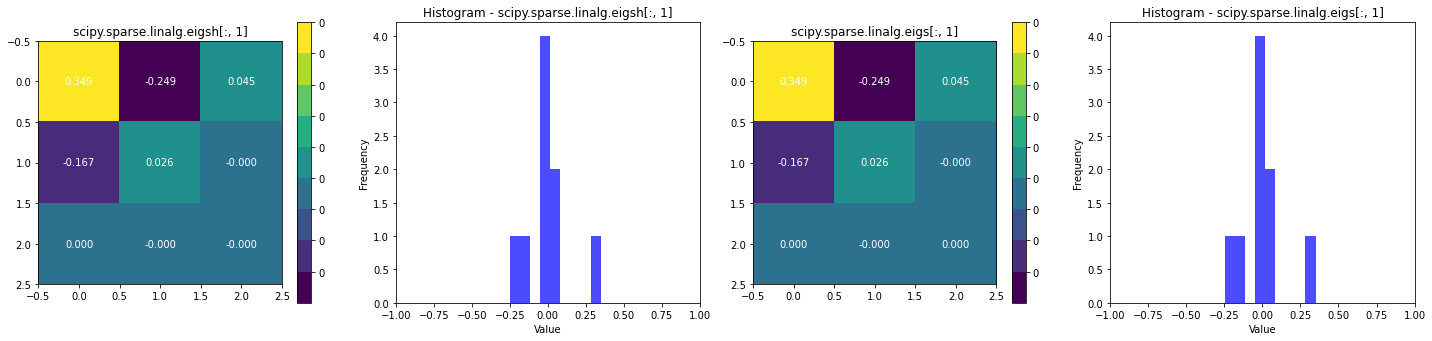

weight None None
elapsed:  0.0006
[0.00647338 0.01723486]
0.006473375728616404 0.017234862552221862
[0 1]
elapsed:  0.0007
[0.00647338+0.j 0.01723486+0.j]
(0.006473375728615491+0j) (0.017234862552221862+0j)
[0 1]


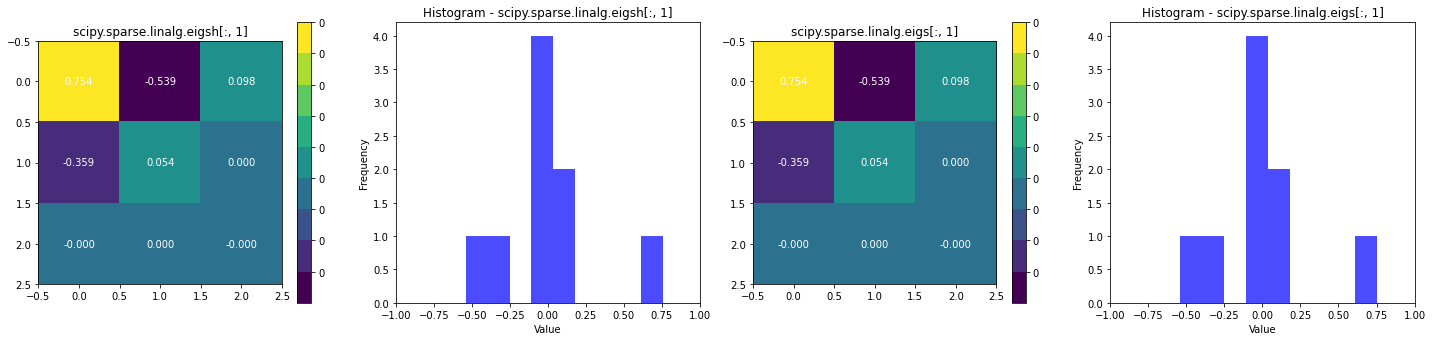

weight None 0
elapsed:  0.0008
[0.00647338 0.01723486]
0.0064733757286154995 0.01723486255222178
[0 1]
elapsed:  0.0010
[0.00647338+0.j 0.01723486+0.j]
(0.006473375728615487+0j) (0.01723486255222174+0j)
[0 1]


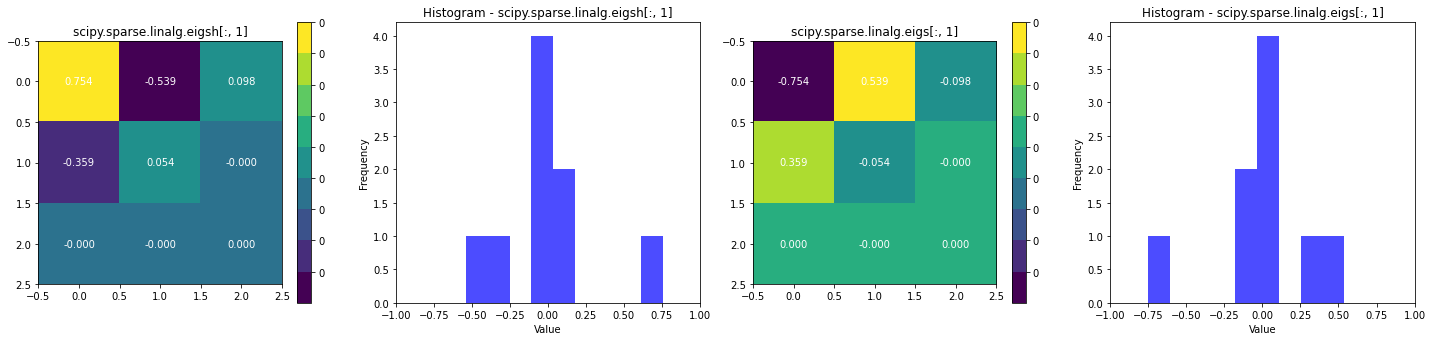

D-weight D None
elapsed:  0.0014
[-3.41087071e-17  1.63119361e-17]
-3.410870714758554e-17 1.6311936072133073e-17
[0 1]
elapsed:  0.0016
[-6.23562597e-17+0.j  2.07528877e-18+0.j]
(-6.235625973154523e-17+0j) (2.07528877390617e-18+0j)
[0 1]


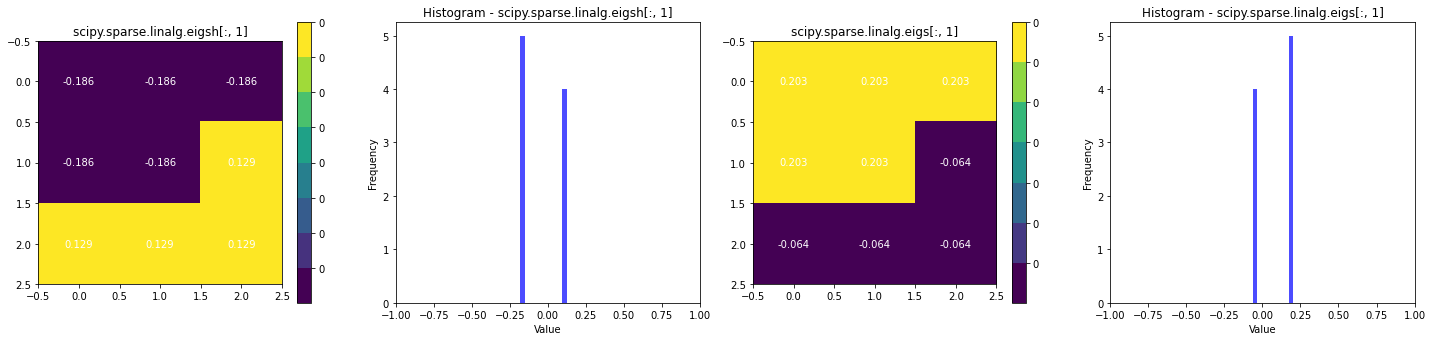

D-weight D 0
elapsed:  0.0014
[-7.92364248e-17  1.11624208e-17]
-7.923642479632025e-17 1.1162420758298917e-17
[0 1]
elapsed:  0.0017
[ 1.11624208e-17+0.j -7.92364248e-17+0.j]
(-7.923642479632028e-17+0j) (1.1162420758298917e-17+0j)
[1 0]


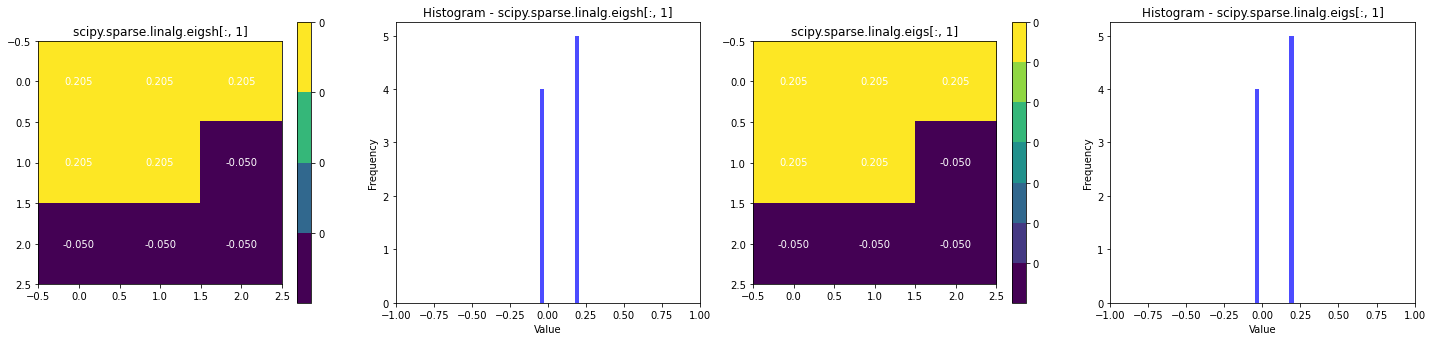

D-weight None None
elapsed:  0.0021
[-8.98985241e-16 -1.42324373e-16]
-8.989852412665983e-16 -1.4232437319957892e-16
[0 1]
elapsed:  0.0021
[-1.26933269e-16+0.j  7.90212341e-17+0.j]
(-1.2693326863970933e-16+0j) (7.902123414497572e-17+0j)
[0 1]


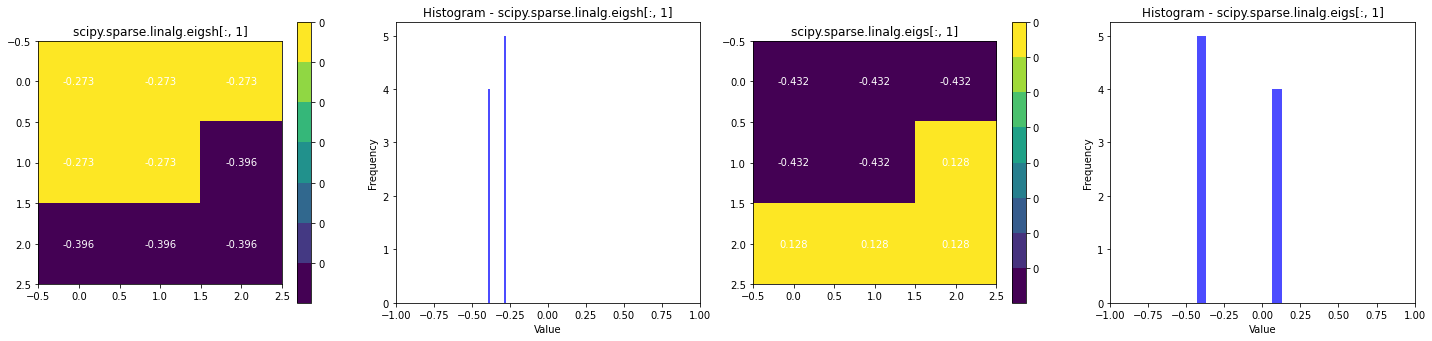

D-weight None 0
elapsed:  0.0014
[-2.47253351e-16  5.07632233e-17]
-2.4725335117709344e-16 5.076322330938929e-17
[0 1]
elapsed:  0.0010
[ 5.07632233e-17+0.j -2.47253351e-16+0.j]
(-2.4725335117709344e-16+0j) (5.07632233093893e-17+0j)
[1 0]


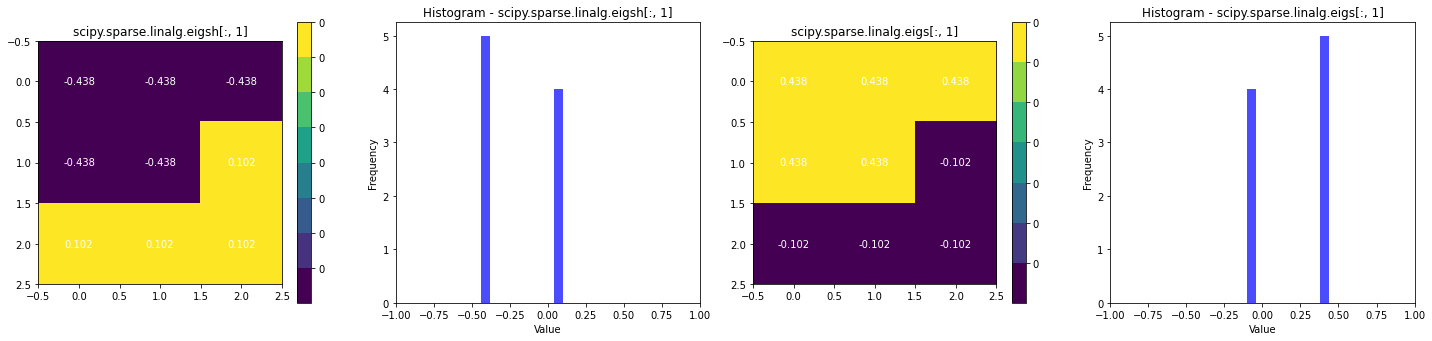

symm_norm_L D None
elapsed:  0.0024
[-7.26017124e-18  6.28457429e-18]
-7.260171241155348e-18 6.2845742870183645e-18
[0 1]
elapsed:  0.0020
[-2.18326854e-17+0.j  4.54560190e-18+0.j]
(-2.1832685356442987e-17+0j) (4.545601902578643e-18+0j)
[0 1]


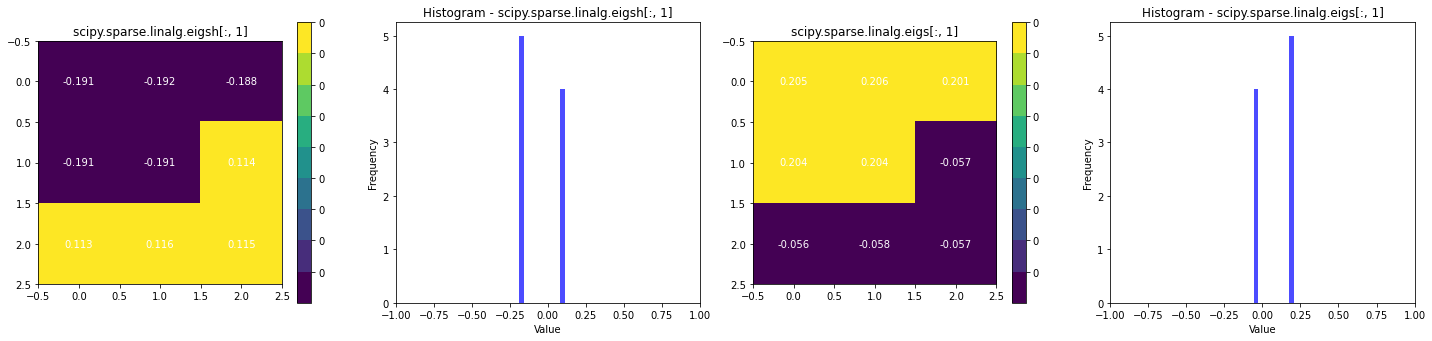

symm_norm_L D 0
elapsed:  0.0017
[-1.29494432e-17  4.81318160e-18]
-1.2949443156180758e-17 4.813181599680239e-18
[0 1]
elapsed:  0.0017
[ 4.81318160e-18+0.j -1.29494432e-17+0.j]
(-1.2949443156180762e-17+0j) (4.813181599680237e-18+0j)
[1 0]


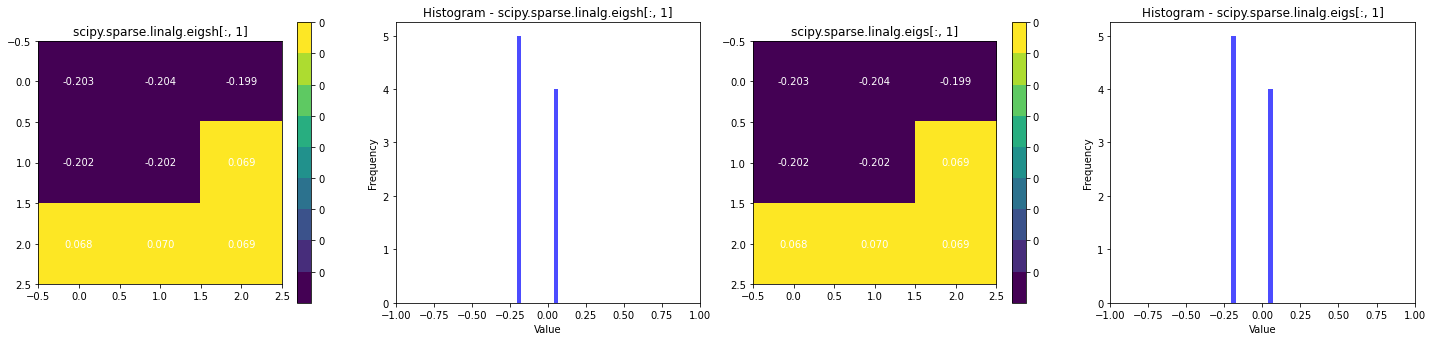

symm_norm_L None None
elapsed:  0.0006
[1.57951782e-17 1.90579615e-16]
1.579517817857318e-17 1.9057961494911298e-16
[0 1]
elapsed:  0.0006
[-6.07646942e-17+0.j  1.79370162e-17+0.j]
(-6.076469419127378e-17+0j) (1.7937016231717073e-17+0j)
[0 1]


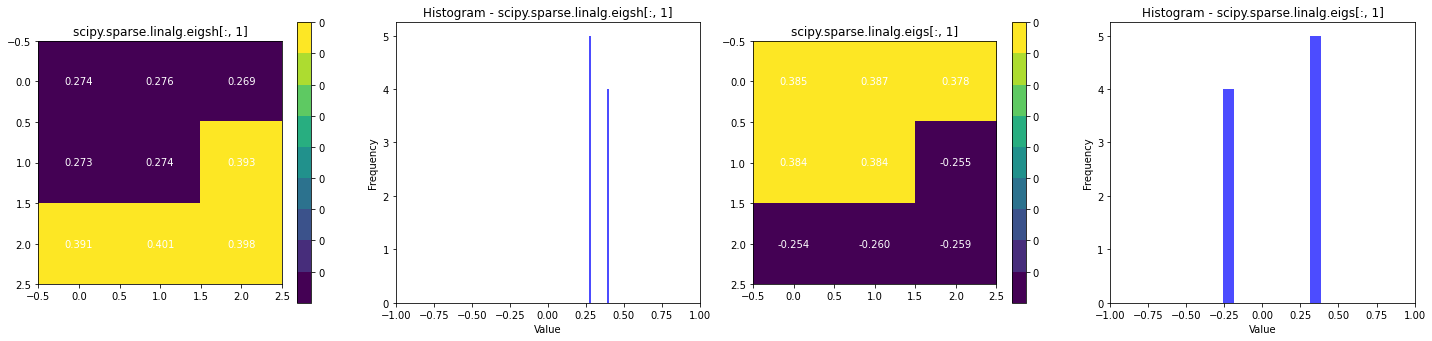

symm_norm_L None 0
elapsed:  0.0007
[-4.08740001e-17  2.16536168e-17]
-4.087400010826253e-17 2.1653616804939427e-17
[0 1]
elapsed:  0.0009
[ 2.16536168e-17+0.j -4.08740001e-17+0.j]
(-4.087400010826254e-17+0j) (2.1653616804939427e-17+0j)
[1 0]


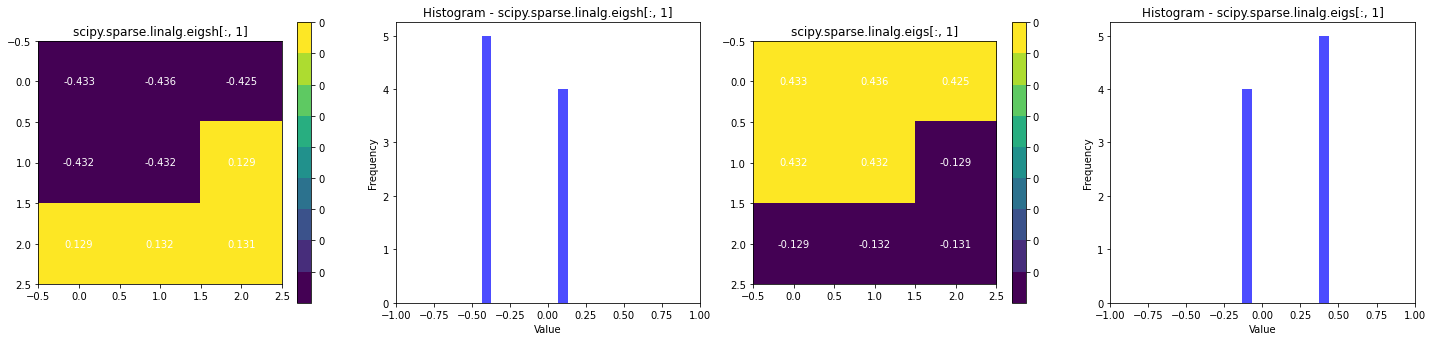

In [235]:
cases = [1,2]

# Normalized cuts (D-W), generalized form
# technically equivalent to symmetrically normalized laplacian (with their inbuilt methods?)
d = np.sum(weight, 1)
D = np.diag(d)

A_list = [weight, D-weight, symmetrically_normalized_laplacian]
A_list_names = ["weight", "D-weight", "symm_norm_L"]
D_list = [D, None]
D_list_names = ["D", "None"]
sigma_list = [None, 0]
sigma_list_names = ["None", "0"]

for i_a,a in enumerate(A_list):
    for i_d,d in enumerate(D_list):
        for i_s,sigma in enumerate(sigma_list):
            print(f'{A_list_names[i_a]} {D_list_names[i_d]} {sigma_list_names[i_s]}')
            all_vecs,names = get_cuts_sparse(a,d,cases,sigma)
            data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
            
            plot_data_list_hist(data_list, names, title='') # or Wx = (1-λ)Dx

In [236]:
# scipy.sparse.linalg.lobpcg(A, X, B)
# Ax = lambda B x
# where X is the initial guess